In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint, quad

# Ecuaciones Diferenciales

---
### Profesor: Juan Marcos Marín
### Profesor: Daniel Ruiz
### Nombre: David Alejandro Pérez, Edgar Junior Córdoba, Gabriela Ruiz Morales.
*Métodos computacionales 2024-II*

---

### **Funciones de utilidad**

In [2]:
def dU_dx2(x, U, f):
    """
    Derivada del vector U

    Parametros:
    U: vector tal que y=U[0] y z=U[1]
    x: Variable respecto a la que se deriva

    Retorna:
    [y,z]
    """
    return [U[1], -f(U[1], U[0], x)]

# se realizara una funcion que resuelva una ecuacion diferencial por medio del metodo euler:

def euler(f, y0, ti, tf, n):

  h = (tf - ti) / n
  t = np.zeros(n + 1)
  y = np.zeros(n + 1)
  dy = np.zeros(n + 1)

  t[0] = ti
  y[0] = y0
  dy[0] = f(t[0], y[0])

  for i in range(n):
    t[i + 1] = t[i] + h
    y[i + 1] = y[i] + h * f(t[i], y[i])
    dy[i] = f(t[i + 1], y[i + 1])
  return t, y, dy

# funcion para resolver ecuaciones de segundo orden

def euler2(f, y0, ypri0, t0, tf, n):

  h = (tf-t0)/n
  print(h)

  t = np.linspace(t0, tf, n+1)
  y = np.zeros(n+1)
  ypri = np.zeros(n+1)
  ypri2 = np.zeros(n+1)

  y[0] = y0
  ypri[0] = ypri0
  ypri2[0] = f(t[0], y[0], ypri[0])

  for i in range(n):
    y[i +1] = y[i] + ypri[i] * h
    ypri[i +1] = ypri[i] + f(t[i], y[i], ypri[i]) * h
    ypri2[i + 1] = f(t[i + 1], y[i + 1], ypri[i + 1])

  return t, y, ypri, ypri2


# funcion de runge kutta que utilizare para hacer mas interesante el analisis

def rungeK4(f, y0, ti, tf, h):
  n = int((tf - ti) / h)
  t = np.linspace(ti, tf, n + 1)
  y = np.zeros(n + 1)
  y[0] = y0

  for i in range(n):
    k0 = h * f(t[i], y[i])
    k1 = h * f(t[i] + h / 2, y[i] + k0 / 2)
    k2 = h * f(t[i] + h / 2, y[i] + k1 / 2)
    k3 = h * f(t[i] + h, y[i] + k2)
    y[i + 1] = y[i] + (k0 + 2*k1 + 2*k2 + k3)/6

    return t, y

## 1
El número de átomos radiactivos que decaen en un período de tiempo dado es proporcional al número de átomos en la muestra:

$$
\frac{dN}{dt} = -\lambda N
$$

con $\lambda=\frac{\ln{2}}{t_{1/2}}$ siendo $t_{1/2}$ el tiempo de vida media.

Escriba un programa que utilice el método de Euler para graficar $N(t)$. Compare con la solución exacta, $N(t) = N_0 e^{-\lambda t}$, para comparación. Tome $N_0=1000$ y $t_{1/2}=15$ horas, lo cual es el valor para el $^{24}Na$.

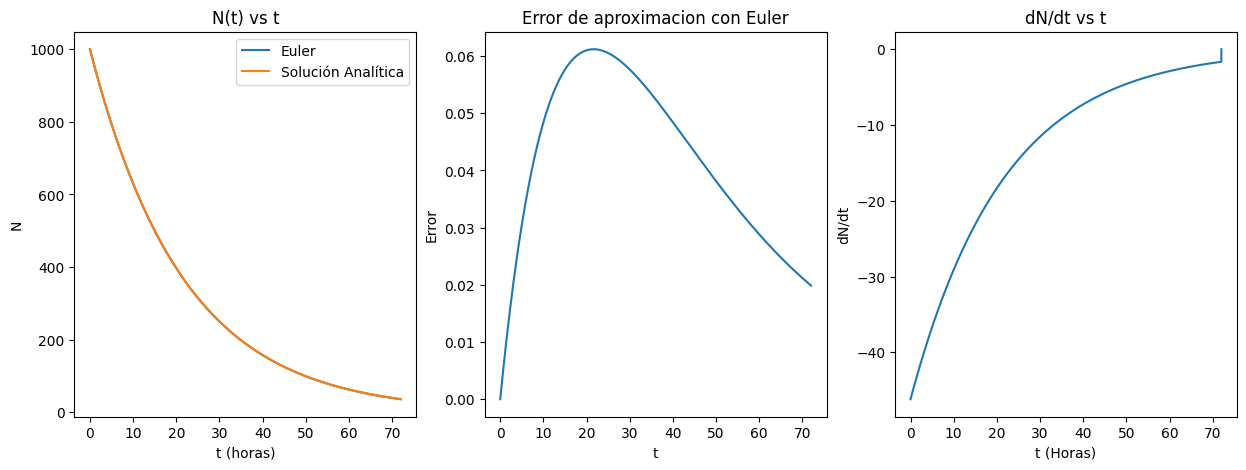

In [3]:
# Datos #
N0 = 1000
tmedia = 15  # tiempo de vida media en horas
lambda_ = np.log(2) / (tmedia)
f = lambda t, y: -lambda_ * y


#Solucionemos#
t, N, dN = euler(f, N0, 0, 72, 10000)


# grafiquemos ##
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].plot(t, N, label='Euler')
ax[0].plot(t, N0 * np.exp(-lambda_ * t), label='Solución Analítica')
ax[0].set_xlabel('t (horas)')
ax[0].set_ylabel('N')
ax[0].set_title('N(t) vs t')
ax[0].legend()

# Error #
error = np.abs(N - N0 * np.exp(-lambda_ * t))
ax[1].plot(t, error)
ax[1].set_xlabel('t')
ax[1].set_ylabel('Error')
ax[1].set_title('Error de aproximacion con Euler')

# grafico de la derivada pq quiero #

ax[2].plot(t, dN)
ax[2].set_xlabel('t (Horas)')
ax[2].set_ylabel('dN/dt')
ax[2].set_title('dN/dt vs t')
plt.show()


# 2
El péndulo de la figura está suspendido de un collar deslizante. El sistema está en reposo cuando se le impone un movimiento oscilante $y(t)=Y \sin{\omega t}$ sobre la cuenta, comenzando en $t=0$. La ecuación diferencial que describe el movimiento del péndulo es

$$\ddot{\theta}=-\frac{g}{L} \sin{\theta} + \frac{\omega^2}{L}Y \cos{\theta}\sin{\omega t} $$

Grafique $\theta$ vs $t$ con $0\leq t \leq 10s$ y determine el $\theta$ mayor en este intervalo. Use $g=9.8 \ m/s^2$, $L=1.0 \ m$, $Y=0.25 \ m$ y $\omega=2.5 \ rad/s$. Con $\theta(0)=0$ y $\dot{\theta}(0)=0.1 \ rad/s$.


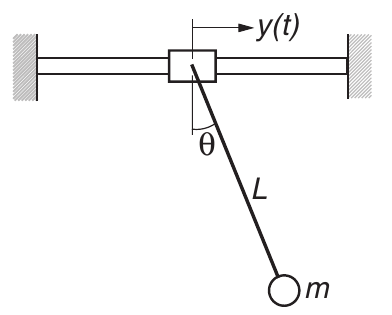

1e-05


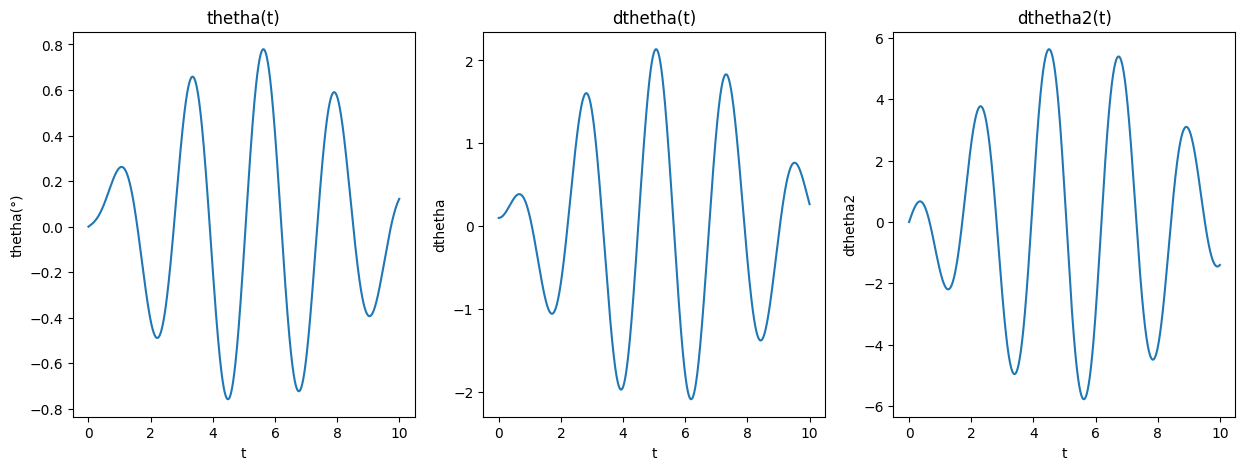

 El valor maximo de thetha en el intervalo dado es de 44.641°


In [4]:
# parametros iniciales #

g = 9.8
L = 1
Y = 0.25
ome = 2.5
thetha0 = 0
thethapri = 0.1

y = lambda t : Y* np.sin(ome*t)
fp = lambda t, thetha, thetha2 : -(g/L)*np.sin(thetha) + (ome**2/L)* np.cos(thetha)* y(t)

# Solucionemos por el metodo de euler para ecuaciones de segundo orden#

t, thetha, dthetha, dthetha2 = euler2(fp, thetha0, thethapri, 0, 10, 1000000)

fig, ax = plt.subplots(1,3, figsize=(15,5))


ax[0].plot(t, thetha)
ax[0].set_xlabel('t')
ax[0].set_ylabel('thetha(°)')
ax[0].set_title('thetha(t)')

ax[1].plot(t, dthetha)
ax[1].set_xlabel('t')
ax[1].set_ylabel('dthetha')
ax[1].set_title('dthetha(t)')

ax[2].plot(t, dthetha2)
ax[2].set_xlabel('t')
ax[2].set_ylabel('dthetha2')
ax[2].set_title('dthetha2(t)')

plt.show()



print(f" El valor maximo de thetha en el intervalo dado es de {round(max(np.rad2deg(thetha)),3)}°")




# 3
El circuito eléctrico de la figura cuenta con una resistencia y un capacitor:

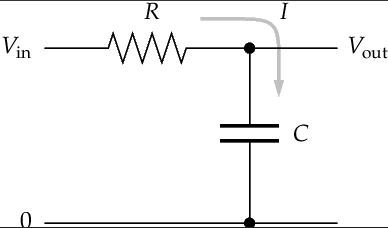


Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.


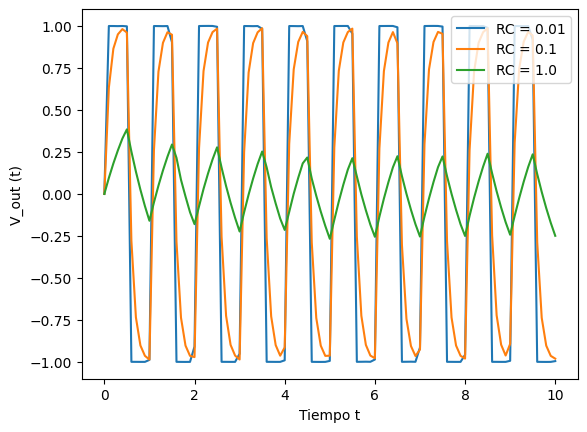

In [5]:
# funcion para aproximar al entero menor
def entero_menor(s):
  s_int = s // 1

  if s_int > s:
    return s_int - 1
  else:
    return s_int
# funcion para el voltaje interno #
def V_int(t):
  if entero_menor(2*t) % 2 == 0:
    return 1
  else:
    return -1

RC = np.array([0.01, 0.1, 1])
t0 = 0
tf = 10
h = 0.1
t_ = np.arange(0,10+h,h)
t_span = (0,10)
V0 = [0]

for i in RC:
  def f(t,V_out):
    return (V_int(t) - V_out)/i
  sol = solve_ivp(f,t_span,V0,t_eval=t_)
  plt.plot(sol.t,sol.y[0],label=f"RC = {i}")
  plt.xlabel("Tiempo t")
  plt.ylabel("V_out (t)")
  plt.legend()






# 4


Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con h=0.001 y distintos valores de $u_0=1$ y $u_0=\pi/2$.


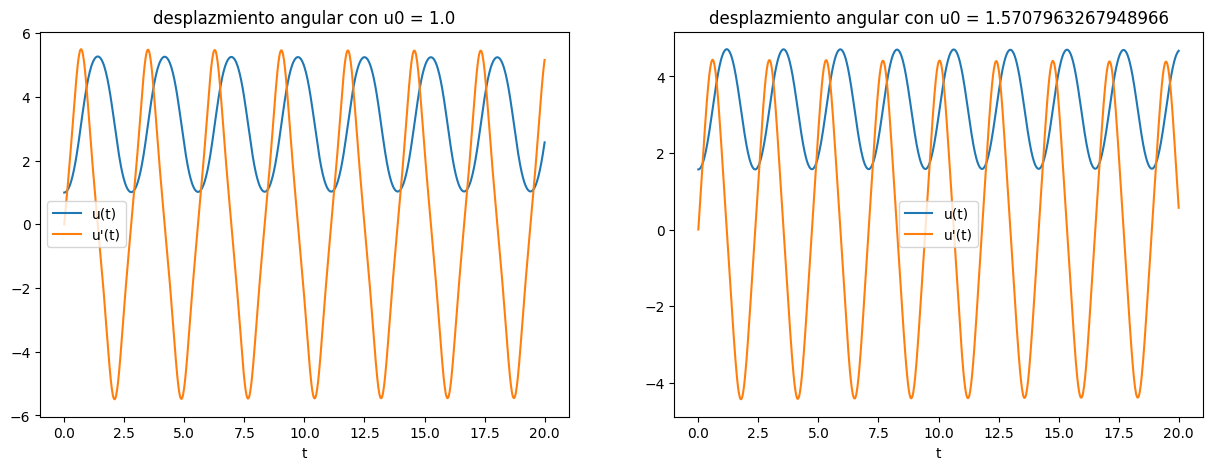

In [6]:
# Datos
g = 9.81
l = 1
h = 0.001
u0 = np.array([1, np.pi/2])
upri0 = 0
t0 = 0
tf = 20

# Solucionemos la ecuacion diferencial #
fu = lambda upri, u, t : -(g/l) *(np.sin(u))
t = np.linspace(0,20, 1000)

fig, ax = plt.subplots(1,2, figsize=(15,5))

for i in range(len(u0)):
  u0s = [u0[i], upri0]
  sol = solve_ivp(dU_dx2, (0, 20), u0s, t_eval=t, method='RK45', args= (fu, ))

  upri = sol.y[1]
  u = sol.y[0]
  t = sol.t

  ax[i].plot(t, u, label = f'u(t)')
  ax[i].plot(t, upri, label = 'u\'(t)')
  ax[i].set_xlabel('t')
  ax[i].set_title(f'desplazmiento angular con u0 = {u0[i]}')
  ax[i].legend()

- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

<ipython-input-67-d815882a6f48>:5: RuntimeWarning: divide by zero encountered in scalar divide
  f = lambda z: 1/(np.sqrt((1-z**2)*(1-alpha*z**2)))
<ipython-input-67-d815882a6f48>:6: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  K.append((2/np.pi)*quad(f, 0, 1)[0])


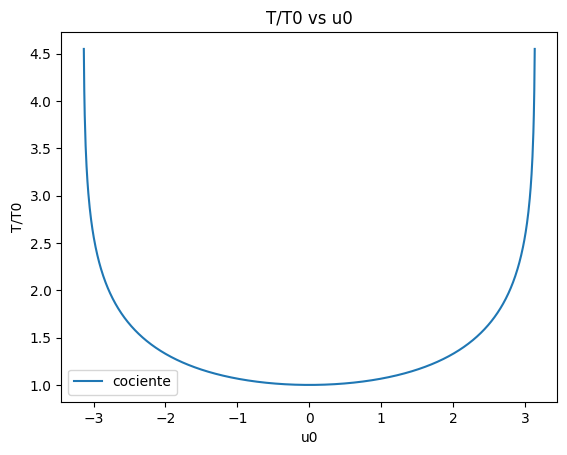

In [67]:

def cocienteT(u0):
  K = []
  for i in range(len(u0)):
    alpha = np.sin(u0[i]/2)**2
    f = lambda z: 1/(np.sqrt((1-z**2)*(1-alpha*z**2)))
    K.append((2/np.pi)*quad(f, 0, 1)[0])

  return K

# definimos el linspace #
u = np.linspace(-np.pi, np.pi, 1000)

# calculamos el cociente #
cociente_lin = cocienteT(u)

# ahora grafiquemos #

plt.plot(u, cociente_lin, label = 'cociente')
plt.xlabel('u0')
plt.ylabel('T/T0')
plt.title('T/T0 vs u0')
plt.legend()
plt.show()


In [113]:
# comparacion con el resultado analitico usando simpy

u0, z = sp.symbols('u0 z')


def Ku_sympy(u0_val):
    alpha_val = float(sp.sin(u0_val / 2)**2)  # alpha completamente numerico
    f = 1 / sp.sqrt((1 - z**2)*(1 - alpha_val*z**2))
    K_mu  = sp.integrate(f, (z, 0, 1))
    return float(K_mu.evalf().as_real_imag()[0])


h = Ku_sympy(-np.pi)
print(h)
u0_vals = np.linspace(-np.pi, np.pi, 100)

K_vals = []
for i in u0_vals:
    print(i)
    K_val = Ku_sympy(i)
    print(K_val)
    K_vals.append(K_val)

# Ahora grafiquemos #

plt.plot(u0_vals, K_vals, label='K(u0)')
plt.xlabel('u0')
plt.ylabel('K(u0)')
plt.title('K(u0) vs u0')
plt.legend()
plt.show()

128.0
-3.141592653589793
128.0
-3.0781261353354537
4.83781829079869
-3.0146596170811146
4.147374713650755
-2.951193098826775
3.745801193692483
-2.887726580572436
3.462988255440609
-2.8242600623180967
3.2455596923828125
-2.7607935440637577
3.0696869077093614
-2.697327025809418
2.9226479530334473
-2.633860507555079
2.7968220710754395
-2.5703939893007397
2.6872848220777787
-2.5069274710464007
2.5906645090197546
-2.443460952792061
2.5045500790016333
-2.379994434537722
2.427156596181813
-2.3165279162833827
2.3571252822875977
-2.2530613980290433
2.2933963927071517
-2.1895948797747042
2.2351291474604915
-2.126128361520365
2.181643471281344
-2.0626618432660258
2.132382245569164
-1.9991953250116865
2.0868832343261596
-1.9357288067573473
2.0447587273705827
-1.872262288503008
2.00568056207356
-1.8087957702486688
1.96936837313139
-1.7453292519943295
1.9355810732893681
-1.6818627337399903
1.9041099310723426
-1.6183962154856508
1.8747731447219849
-1.5549296972313116
1.847411464829059
-1.491463178976

PolynomialDivisionFailed: couldn't reduce degree in a polynomial division algorithm when dividing [4.0*_x2, 0.0, -19.0328530412391*_x2, 0.0, 28.8135406324595*_x2, 0.0, -13.7806875912205*_x2, 0.0] by [2.7416288660598e-29, 0.0, -2.7416288660598e-29]. This can happen when it's not possible to detect zero in the coefficient domain. The domain of computation is RR[_x2]. Your working precision or tolerance of computations may be set improperly. Adjust those parameters of the coefficient domain and try again.

In [114]:
print(f"""al parecer consegur un array desde simpy
para esta funcion es bastante dificil, principalmenet
porque hay valores de u que hacen que el denominadr de 0,
por lo que comparare solo los datos que alcanzaron a ser almacenados""")

al parecer consegur un array desde simpy 
para esta funcion es bastante dificil, principalmenet 
porque hay valores de u que hacen que el denominadr de 0, 
por lo que comparare solo los datos que alcanzaron a ser almacenados


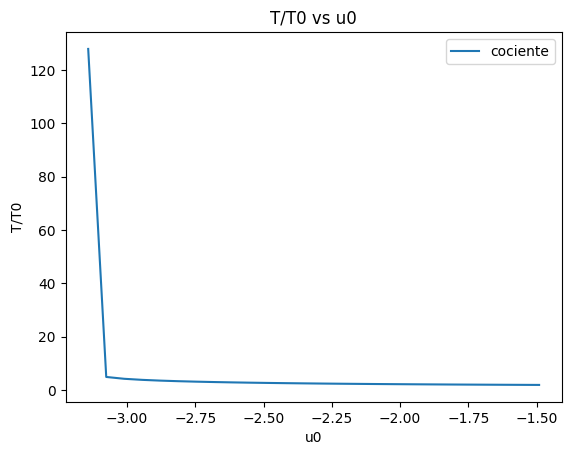

In [119]:
plt.plot(np.linspace(-np.pi, -1.4914631789769723, 26), K_vals, label = 'cociente')
plt.xlabel('u0')
plt.ylabel('T/T0')
plt.title('T/T0 vs u0')
plt.legend()
plt.show()

# **5**

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$
\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m}
$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v
$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x
$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2}
$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.


0.0
0.0005
0.05
0.0005
0.3
0.0005


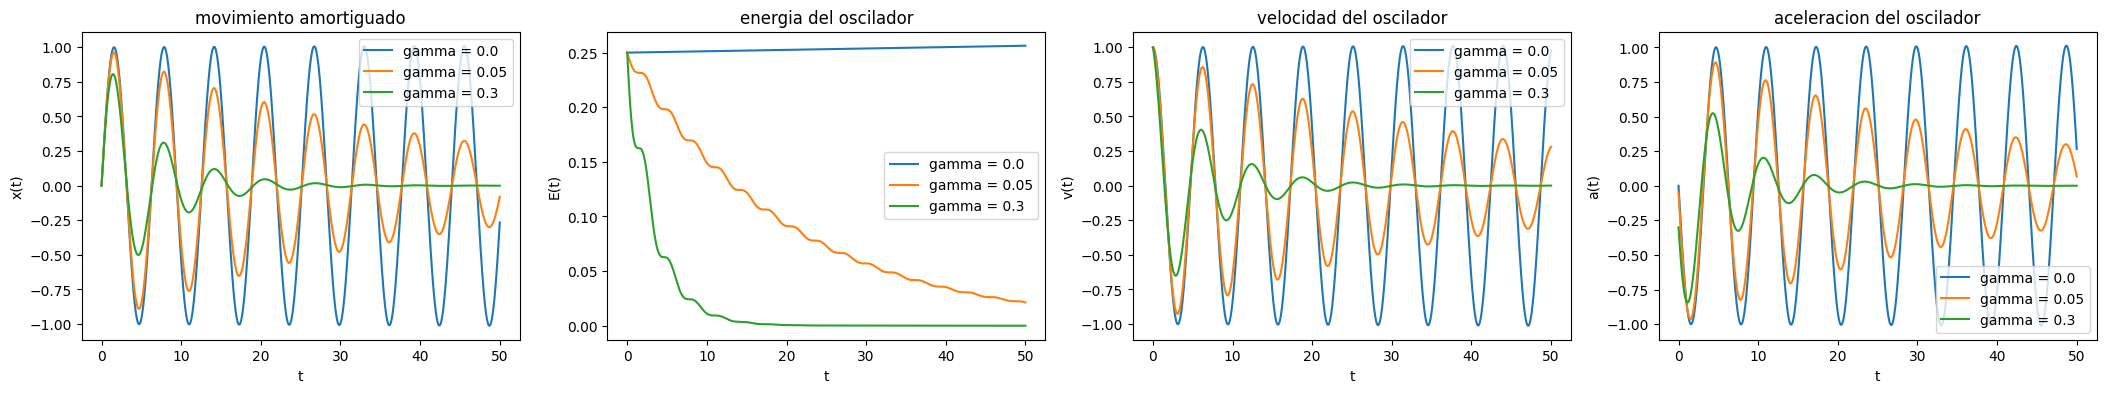

In [8]:


# a)
f = lambda t, x, v, gammas, F, m, w : (F/m) - gammas*(v) - (w0**2) * x

# datos #
x0 = 0
v0 = 1
F = 0
gamma = np.array([0, 0.05, 0.3])

# vamos a suponer la masa y k #
m = 0.5  # kg
k = 0.5
w0 = (k/m)**0.5

# funciones

fa = lambda t, x, v, gammas : f(t, x, v, gammas, F, m, w0)
E = lambda t, v, x : 0.5*m*(v**2) + 0.5*k*(x**2)

# lo resolveremos con la funcion realizada de Euler

fig, ax = plt.subplots(1, 4 , figsize = (26,4))

for i in range(len(gamma)):
  fnew = lambda t, x, v: fa(t, x, v, gamma[i])
  print(gamma[i])
  t, x, v, a = euler2(fnew, x0, v0, 0, 50, 100000)
  E_lin = E(t, v, x)
  ax[0].plot(t, x, label = f'gamma = {gamma[i]}')
  ax[0].set_xlabel('t')
  ax[0].set_ylabel('x(t)')
  ax[0].set_title(f'movimiento amortiguado')
  ax[0].legend()

  ax[1].plot(t, E_lin, label = f'gamma = {gamma[i]}')
  ax[1].set_xlabel('t')
  ax[1].set_ylabel('E(t)')
  ax[1].set_title(f'energia del oscilador')
  ax[1].legend()

  ax[2].plot(t, v, label = f'gamma = {gamma[i]}')
  ax[2].set_xlabel('t')
  ax[2].set_ylabel('v(t)')
  ax[2].set_title(f'velocidad del oscilador')
  ax[2].legend()

  ax[3].plot(t, a, label = f'gamma = {gamma[i]}')
  ax[3].set_xlabel('t')
  ax[3].set_ylabel('a(t)')
  ax[3].set_title(f'aceleracion del oscilador')
  ax[3].legend()


plt.show()








- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.


0.0005
0.0005
0.0005


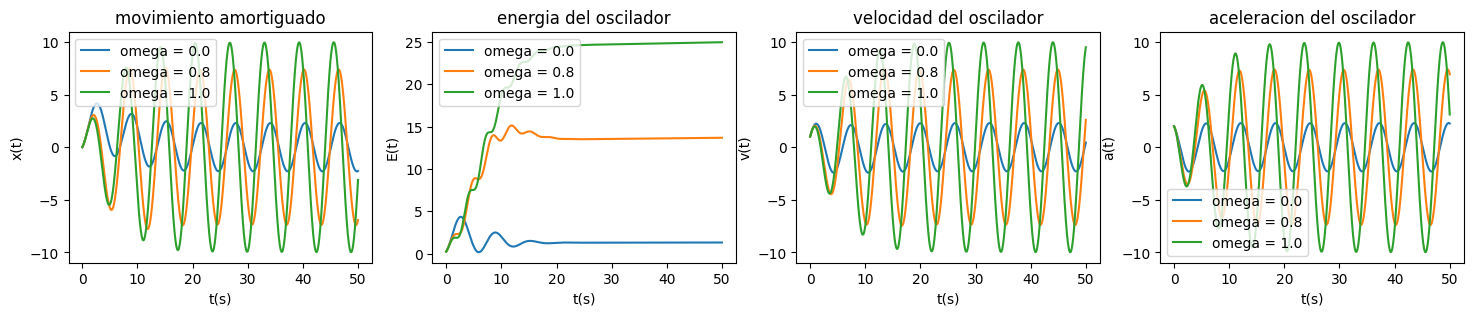

In [9]:
# datos dados #
gamma = 0
F0 = 1  # N
T = 10  # s
#w0 = 2*np.pi/T
x0 = x0
v0 = v0
ome = np.array([0, 0.8*w0, w0])
Ff = lambda t, w : F0*np.cos(w*t)*np.exp(-(t**2)/(T**2))

fb = lambda t, x, v, w: f(t, x, v, gamma, Ff(t, w), m, w0)

# Ahora, analogo al procedimiento de arriba #
fig, axi = plt.subplots(1, 4, figsize = (18,3))
for i in range(len(ome)):
  fnew = lambda t, x, v: fb(t, x, v, ome[i])
  t, x, v, a = euler2(fnew, x0, v0, 0, 50, 100000)
  E_lin = E(t, v, x)

  axi[0].plot(t, x, label = f'omega = {round(ome[i], 3)}')
  axi[0].set_xlabel('t(s)')
  axi[0].set_ylabel('x(t)')
  axi[0].set_title(f'movimiento amortiguado')
  axi[0].legend()

  axi[1].plot(t, E_lin, label = f'omega = {round(ome[i],3)}')
  axi[1].set_xlabel('t(s)')
  axi[1].set_ylabel('E(t)')
  axi[1].set_title(f'energia del oscilador')
  axi[1].legend()

  axi[2].plot(t, v, label = f'omega = {round(ome[i],3)}')
  axi[2].set_xlabel('t(s)')
  axi[2].set_ylabel('v(t)')
  axi[2].set_title(f'velocidad del oscilador')
  axi[2].legend()

  axi[3].plot(t, a, label = f'omega = {round(ome[i],3)}')
  axi[3].set_xlabel('t(s)')
  axi[3].set_ylabel('a(t)')
  axi[3].set_title(f'aceleracion del oscilador')
  axi[3].legend()

plt.show()

# 6

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- α = 0.8 (tasa de reproducción de los conejos)
- β = 0.04 (tasa de depredación de conejos por zorros)
- γ = 0.3 (tasa de mortalidad natural de los zorros)
- δ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


a. Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

b. Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

c. Compare los resultados de Euler y RK4 mediante:
   * Gráficas de la evolución temporal de ambas poblaciones
   * Diagrama de fase (x vs y)
   * Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

d. Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

e. Investigue cómo las variaciones en los parámetros α, β, γ y δ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.



In [10]:
#a)
#Datos
alpha = 0.8
beta = 0.04
gamma = 0.3
delta = 0.01

#Funcion Euler
def euler_(f1,f2,z0,ti,tf,h):   #z0 es un array de condiciones iniciales
  n = int((tf-ti)/h)
  t = np.zeros(n+1)
  x = np.zeros(n+1)
  y = np.zeros(n+1)

  t[0] = ti
  x[0] = z0[0]
  y[0] = z0[1]

  for i in range(n):
    t[i+1] = t[i]+h
    x[i+1] = x[i] + f1(t[i],x[i],y[i])*h
    y[i+1] = y[i] + f2(t[i],x[i],y[i])*h
  return t,x,y

#Condiciones iniciales
z0 = [50,20]
ti = 0
tf = 50
h = 0.1

#Funciones
f1 = lambda t,x,y: alpha*x - beta*x*y
f2 = lambda t,x,y: -gamma*y + delta*x*y

t,x,y = euler_(f1,f2,z0,ti,tf,h)

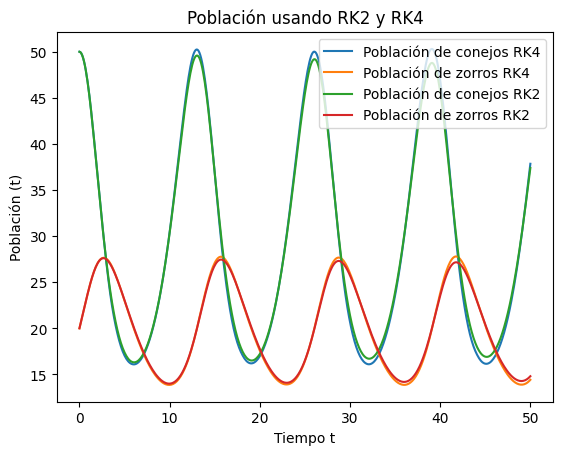

In [11]:
#b)
def f(t,z):
  x,y = z
  dxdt = alpha*x - beta*x*y
  dydt = -gamma*y + delta*x*y
  return dxdt,dydt

h = 0.1
t_ = np.arange(0,50+h,h)
t_span = (0,50)

sol1 = solve_ivp(f,t_span,z0,t_eval=t_)   #RK4
sol2 = solve_ivp(f,t_span,z0,method="RK23",t_eval=t_)   #RK2

plt.plot(sol1.t,sol1.y[0], label="Población de conejos RK4")
plt.plot(sol1.t,sol1.y[1],label="Población de zorros RK4")
plt.plot(sol2.t,sol2.y[0], label="Población de conejos RK2")
plt.plot(sol2.t,sol2.y[1],label="Población de zorros RK2")
plt.xlabel("Tiempo t")
plt.ylabel("Población (t)")
plt.title("Población usando RK2 y RK4")
plt.legend()

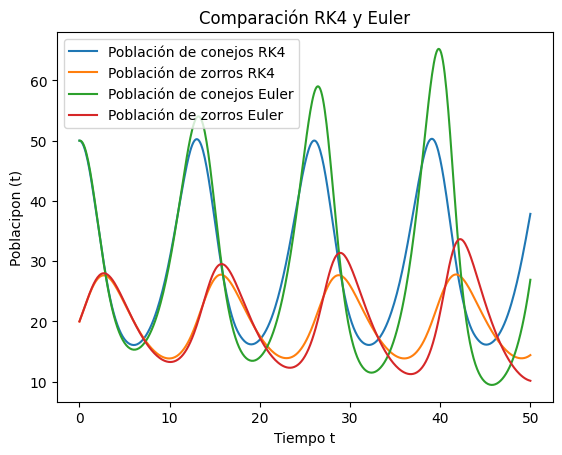

In [12]:
#c)
#Rungekutta
plt.plot(sol1.t,sol1.y[0], label="Población de conejos RK4")
plt.plot(sol1.t,sol1.y[1],label="Población de zorros RK4")
#Euler
plt.plot(t,x,label="Población de conejos Euler")
plt.plot(t,y,label="Población de zorros Euler")

plt.xlabel("Tiempo t")
plt.ylabel("Poblacipon (t)")
plt.title("Comparación RK4 y Euler")
plt.legend()

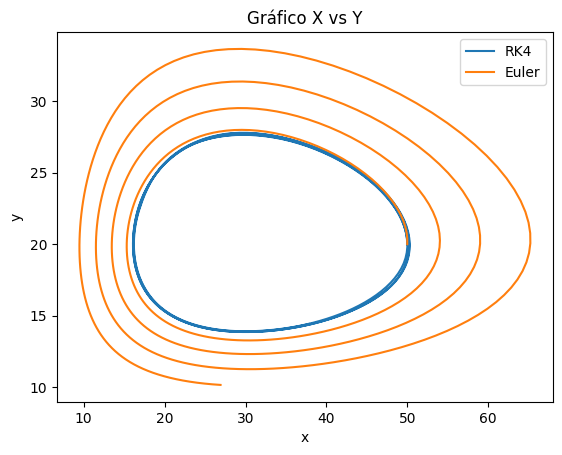

In [13]:
plt.plot(sol1.y[0],sol1.y[1],label="RK4")
plt.plot(x,y,label="Euler")
plt.title("Gráfico X vs Y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

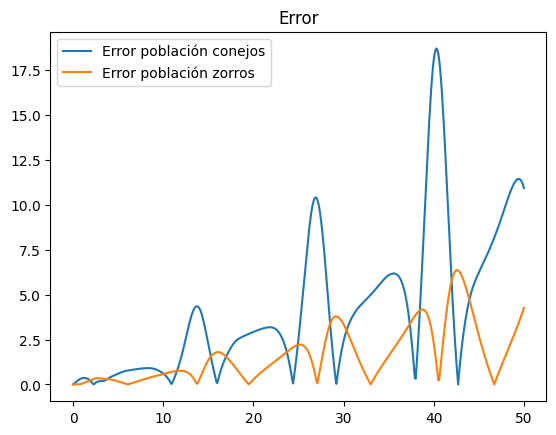

In [14]:
plt.plot(t,abs(x-sol1.y[0]),label="Error población conejos")
plt.plot(t,abs(y-sol1.y[1]),label="Error población zorros")
plt.title("Error")
plt.legend()

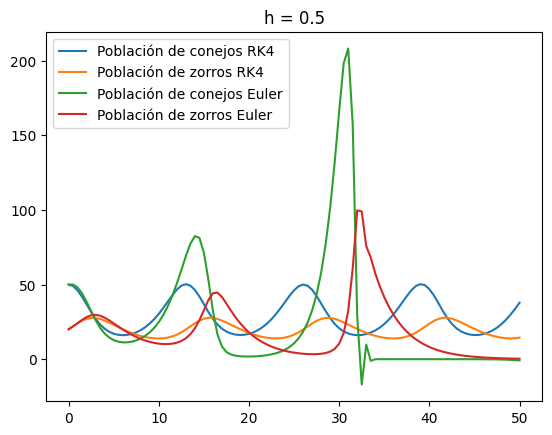

In [15]:
#d)
h = 0.5
t_ = np.arange(0,50+h,h)
t_span = (0,50)
sol1 = solve_ivp(f,t_span,z0,t_eval=t_)
t,x,y = euler_(f1,f2,z0,ti,tf,h)
plt.plot(sol1.t,sol1.y[0], label="Población de conejos RK4")
plt.plot(sol1.t,sol1.y[1],label="Población de zorros RK4")

plt.plot(t,x,label="Población de conejos Euler")
plt.plot(t,y,label="Población de zorros Euler")

plt.title("h = 0.5")
plt.legend()

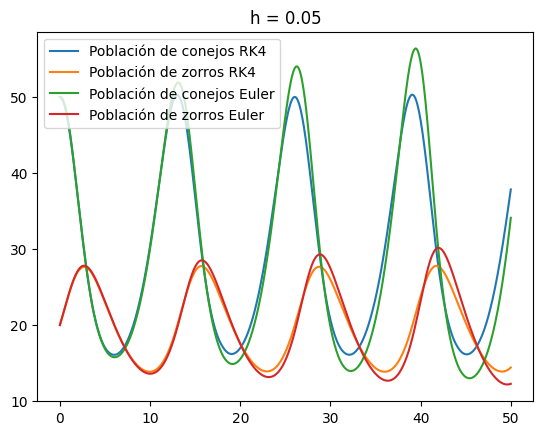

In [16]:
h = 0.05
t_ = np.arange(0,50+h,h)
t_span = (0,50)
sol1 = solve_ivp(f,t_span,z0,t_eval=t_)
t,x,y = euler_(f1,f2,z0,ti,tf,h)
plt.plot(sol1.t,sol1.y[0], label="Población de conejos RK4")
plt.plot(sol1.t,sol1.y[1],label="Población de zorros RK4")

plt.plot(t,x,label="Población de conejos Euler")
plt.plot(t,y,label="Población de zorros Euler")

plt.title("h = 0.05")
plt.legend()

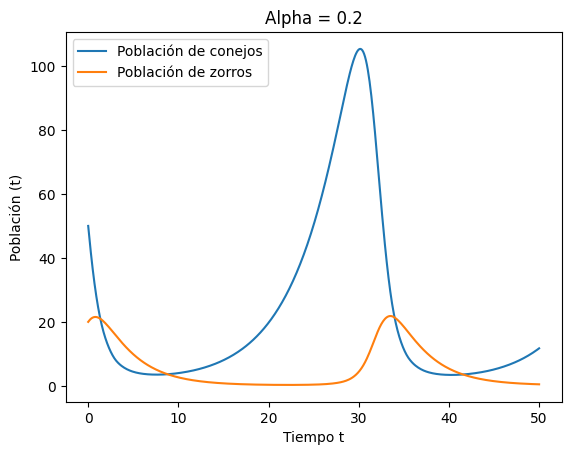

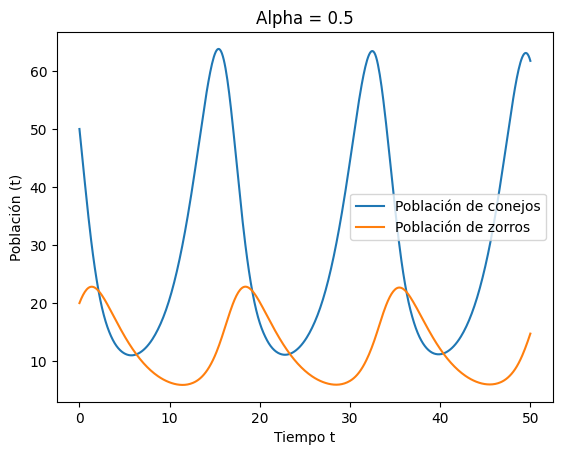

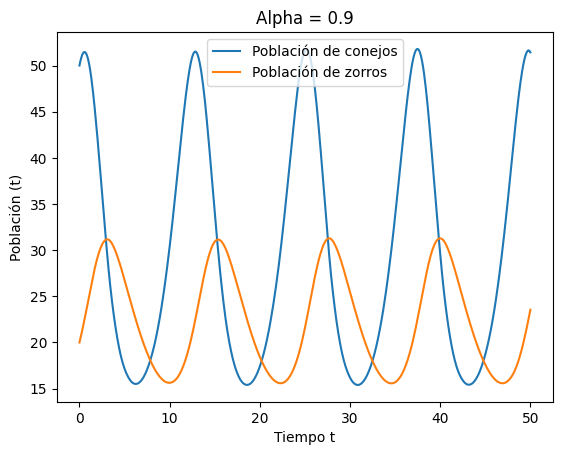

In [17]:
#e)
#Variando alpha
for i, a in enumerate([0.2,0.5,0.9]):
  plt.figure(i)
  def f(t,z):
    x,y = z
    dxdt = a*x - beta*x*y
    dydt = -gamma*y + delta*x*y
    return dxdt,dydt
  h = 0.1
  t_ = np.arange(0,50+h,h)
  t_span = (0,50)
  sol1 = solve_ivp(f,t_span,z0,t_eval=t_)
  plt.plot(sol1.t,sol1.y[0], label="Población de conejos")
  plt.plot(sol1.t,sol1.y[1],label="Población de zorros")
  plt.xlabel("Tiempo t")
  plt.ylabel("Población (t)")
  plt.title(f"Alpha = {a}")
  plt.legend()

# 7

En un laboratorio de dinámica, se estudia el comportamiento de dos péndulos acoplados mediante un resorte de constante elástica $k$. Cada péndulo de longitud $L$ y masa $m$ está suspendido de un soporte fijo y oscila en el plano. Se asume que los desplazamientos son pequeños, permitiendo aproximar el movimiento mediante ecuaciones diferenciales lineales.  

Las ecuaciones de movimiento para los ángulos $\theta_1(t)$ y $\theta_2(t)$ de los péndulos con respecto a la vertical están dadas por el sistema:  

$$
\begin{aligned}
mL^2 \ddot{\theta}_1 + mgL\theta_1 + kL^2(\theta_1 - \theta_2) &= 0, \\
mL^2 \ddot{\theta}_2 + mgL\theta_2 + kL^2(\theta_2 - \theta_1) &= 0.
\end{aligned}
$$

Definiendo el vector de estado $\mathbf{y} = [\theta_1, \dot{\theta}_1, \theta_2, \dot{\theta}_2]^T$, escribir el sistema en forma matricial como una ecuación de primer orden:

$$
\frac{d\mathbf{y}}{dt} = \mathbf{A} \mathbf{y},
$$

donde $\mathbf{A}$ es la matriz de coeficientes del sistema.  

- Expresar el sistema en forma de ecuaciones diferenciales de primer orden.  
- Construir la matriz $\mathbf{A}$ del sistema.  
- Resolver el sistema utilizando el **método de Runge-Kutta de cuarto orden (RK4)**.  
- Comparar los resultados obtenidos con los distintos métodos numéricos.  
- Analizar la estabilidad de la solución y discutir los efectos de la constante $k$ en la dinámica del sistema.  
- Graficar la evolución temporal de los ángulos $\theta_1(t)$ y $\theta_2(t)$.
- Representar la trayectoria en el espacio de fases $(\theta_1, \dot{\theta}_1)$ y $(\theta_2, \dot{\theta}_2)$.  

Para la simulación, se pueden utilizar los valores:  
- $m = 1$ kg,  
- $L = 1$ m,  
- $g = 9.81$ m/s²,  
- $k = 0.5$ N/m,  
- Condiciones iniciales: $\theta_1(0) = 0.1$, $\dot{\theta}_1(0) = 0$, $\theta_2(0) = 0$, $\dot{\theta}_2(0) = 0$.  
- Intervalo de simulación: $t \in [0,10]$ s con paso $\Delta t = 0.01$ s.  


In [18]:
# Parametros
m = 1.0  # kg
L = 1.0  # m
g = 9.81  # m/s²
k = 0.5  # N/m

# Condiciones iniciales
y0 = np.array([0.1, 0.0, 0.0, 0.0])

# Intervalo de simulación
t_start = 0.0
t_end = 10.0
dt = 0.01
t = np.arange(t_start, t_end, dt)

# Definimos la matriz A
A = np.array([
    [0, 1, 0, 0],
    [-(g/L + k/m), 0, k/m, 0],
    [0, 0, 0, 1],
    [k/m, 0, -(g/L + k/m), 0]
])

# Función para el sistema de ecuaciones diferenciales
def system(t, y):
    return A @ y

# Resolviendo el sistema de ecuaciones diferenciales
sol = solve_ivp(system, (t_start,t_end), y0, method='RK45', t_eval=t)

# Extraemos las soluciones
t_sol = sol.t
theta1_sol = sol.y[0]
theta1_dot_sol = sol.y[1]
theta2_sol = sol.y[2]
theta2_dot__sol = sol.y[3]

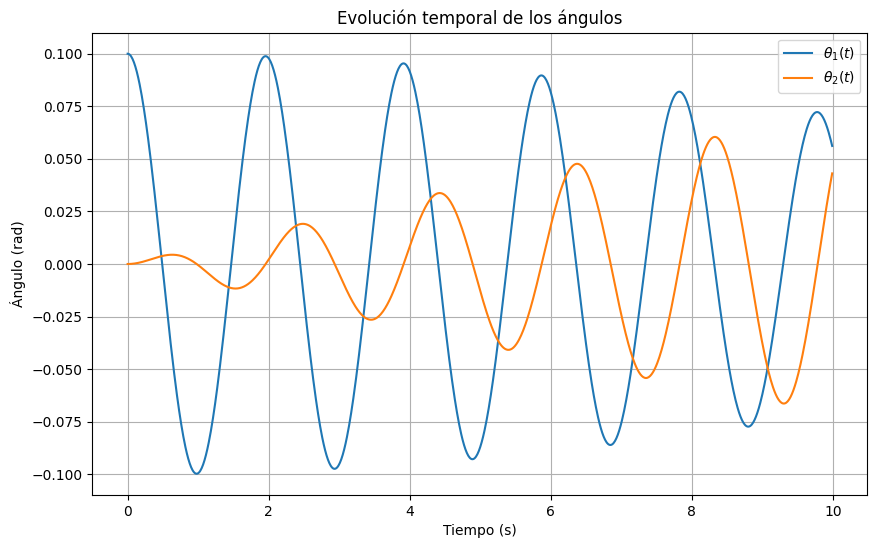

In [19]:
# Gráfica de la evolución temporal de los ángulos
plt.figure(figsize=(10, 6))
plt.plot(t, theta1_sol, label=r'$\theta_1(t)$')
plt.plot(t, theta2_sol, label=r'$\theta_2(t)$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Evolución temporal de los ángulos')
plt.legend()
plt.grid()
plt.show()

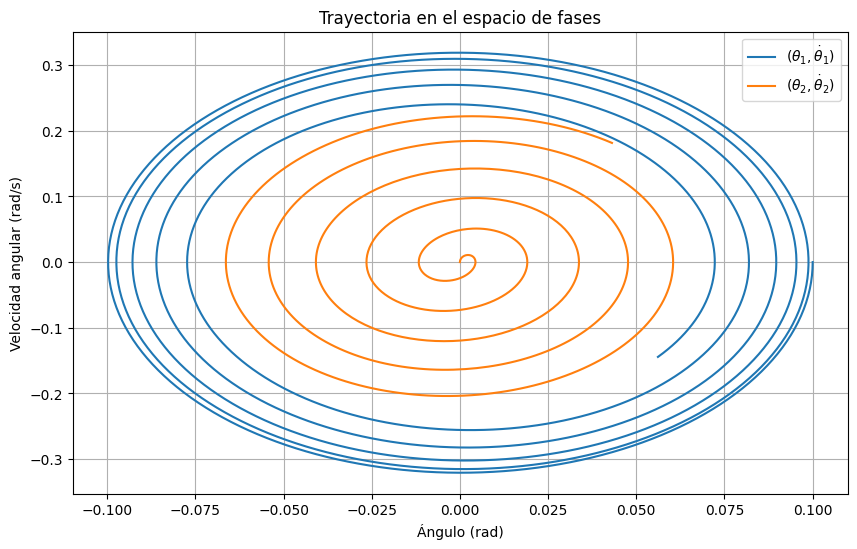

In [20]:
# Gráfica de la trayectoria en el espacio de fases
plt.figure(figsize=(10, 6))
plt.plot(theta1_sol, theta1_dot_sol, label=r'$(\theta_1, \dot{\theta}_1)$')
plt.plot(theta2_sol, theta2_dot__sol, label=r'$(\theta_2, \dot{\theta}_2)$')
plt.xlabel('Ángulo (rad)')
plt.ylabel('Velocidad angular (rad/s)')
plt.title('Trayectoria en el espacio de fases')
plt.legend()
plt.grid()
plt.show()

# 8

El problema restringido de tres cuerpos estudia el movimiento de una partícula de masa despreciable (como un satélite o un asteroide) bajo la influencia gravitacional de dos cuerpos masivos $m_1$ y $m_2$ (como el Sol y la Tierra) que orbitan su centro de masa en trayectorias circulares. Se asume que los dos cuerpos principales siguen la tercera ley de Kepler y que la partícula testigo no influye en su movimiento.  

Si utilizamos un **sistema de coordenadas rotante** centrado en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, las ecuaciones de movimiento del cuerpo de prueba vienen dadas por:  

$$
\ddot{x} - 2\omega \dot{y} = \frac{\partial U}{\partial x}, \quad  
\ddot{y} + 2\omega \dot{x} = \frac{\partial U}{\partial y}
$$

donde $\omega$ es la velocidad angular del sistema y $U$ es el **potencial efectivo**, dado por:  

$$
U = -\frac{G m_1}{r_1} - \frac{G m_2}{r_2} - \frac{1}{2} \omega^2 (x^2 + y^2),
$$

con $r_1$ y $r_2$ las distancias del cuerpo de prueba a $m_1$ y $m_2$.  

Se sabe que en este sistema existen cinco **puntos de Lagrange** $L_1, L_2, L_3, L_4, L_5$ donde las fuerzas gravitacionales y la aceleración centrífuga se equilibran, permitiendo que un objeto permanezca en equilibrio relativo con respecto a los cuerpos masivos.  

- Determinar las coordenadas de los puntos de Lagrange en el sistema rotante, en particular $L_4$ y $L_5$.  
- Explicar la condición para que estos puntos sean estables en términos de la razón de masas $\mu = m_2 / (m_1 + m_2)$.  

- Introducir pequeñas perturbaciones alrededor de $L_4$ y $L_5$:  
  $$
  x = x_{L_4} + \xi, \quad y = y_{L_4} + \eta.
  $$
- Expandir las ecuaciones de movimiento en serie de Taylor hasta primer orden en $\xi$ y $\eta$.  
- Escribir el sistema de ecuaciones en forma matricial:  
  $$
  \frac{d}{dt}  
  \begin{bmatrix}  
  \xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
  \end{bmatrix}  
  = \mathbf{A}  
  \begin{bmatrix}  
  \xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
  \end{bmatrix},
  $$  
  donde $\mathbf{A}$ es la matriz jacobiana evaluada en $L_4$.  
- Calcular los valores propios de $\mathbf{A}$ y analizar su signo y parte imaginaria.  
- Explicar por qué la estabilidad depende de la razón de masas $\mu$.  
- Identificar el valor crítico de $\mu$ que separa las regiones de estabilidad e inestabilidad (conocido como el criterio de Routh, aproximadamente $\mu \approx 0.03852$).  



[ 0.00000000e+00  0.00000000e+00 -9.71445147e-17 -9.71445147e-17]
Al ver la parte real de los valores propios, vemos que nos darian resultados que no osilaran en torno al punto de lagrange 
El valor critico donde la solucion comienza a diverger es 0.03852842809364549


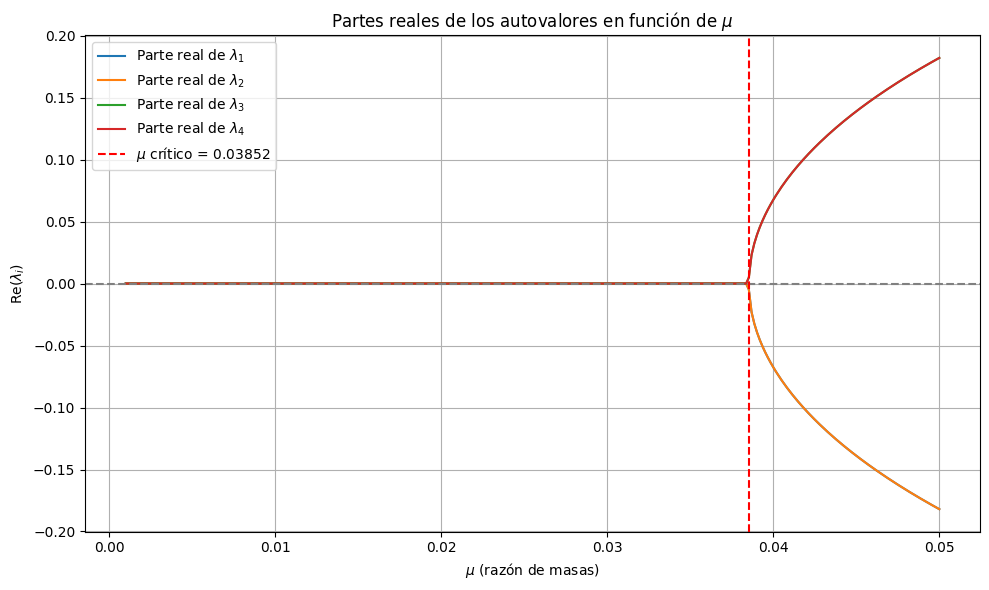

In [136]:
w = 1

# vamos a suponer la masa 2 y encontraremos la masa 1 en funcion de m1
u = 0.9
gm = 1  # g(m1 + m2) = 1, factor de normalizacion de G
m1 = 1 - u   # m1/(m1 + m2)
m2 = u    # m2/ (m1 + m2)

L4 = np.array([1/2 - u, np.sqrt(3)/2])  # punto de lagrange 4
L5 = np.array([1/2 - u, -np.sqrt(3)/2])  # punto de lagrange 5


x, y = sp.symbols('x y')
rp = sp.sqrt(x**2 + y**2)  # distancia desde el centro del sistema coordenado al punto de prueba
rp1 = sp.sqrt((u + x)**2 + (y)**2)  # esta es la distancia desde la masa 1 hasta el punto de prueba
rp2 = sp.sqrt((x - (1-u))**2 + (y)**2) # esta es la distancia desde la masa 2 hasta el punto de prueba

# multiplicamos por (m1 + m2)/(m1 + m2) pa no afectar la ecuacion y hacer uso de el factor de normalizacion de G ##

U = - (gm*(1 - u))/rp1 - gm*(u)/rp2 - ((w*rp)**2)*0.5
d2Udx2 = sp.diff(U, x, 2)
d2Udy2 = sp.diff(U, y, 2)
d2Udxdy = sp.diff(sp.diff(U, x), y)
d2Udydx = sp.diff(sp.diff(U, y), x)

d2Udx2lam = sp.lambdify((x, y), d2Udx2, 'numpy')
d2Udy2lam = sp.lambdify((x, y), d2Udy2, 'numpy')
d2Udxdylam = sp.lambdify((x, y), d2Udxdy, 'numpy')
d2Udydxlam = sp.lambdify((x, y), d2Udydx, 'numpy')

a = d2Udx2lam(L4[0], L4[1])
b = d2Udxdylam(L4[0], L4[1])
c = d2Udydxlam(L4[0], L4[1])
d = d2Udy2lam(L4[0], L4[1])

A = np.array([[0, 1, 0, 0],
              [a, 0, b, 2*w],
              [0, 0, 0, 1],
              [c, -2*w, d, 0]])

val, vec = np.linalg.eig(A)
print(np.real(val))

print("Al ver la parte real de los valores propios, vemos que nos darian resultados que no osilaran en torno al punto de lagrange ")


# para ver como varia mu volveremos a realizar el proceso anterior pero ya el potencial estara tambien en funcion de mu

u_sym = sp.Symbol('u')
rp1 = sp.sqrt((u_sym + x)**2 + y**2)
rp2 = sp.sqrt((x - (1 - u_sym))**2 + y**2)
U = (1 - u_sym)/rp1 + u_sym/rp2 + 0.5 * (w**2)*(x**2 + y**2)

# Derivadas segundas del potencial efectivo
d2Udx2 = sp.diff(U, x, 2)
d2Udy2 = sp.diff(U, y, 2)
d2Udxdy = sp.diff(sp.diff(U, x), y)
d2Udydx = sp.diff(sp.diff(U, y), x)

# vamos a lamdbdificarlas
d2Udx2_func = sp.lambdify((x, y, u_sym), d2Udx2, 'numpy')
d2Udy2_func = sp.lambdify((x, y, u_sym), d2Udy2, 'numpy')
d2Udxdy_func = sp.lambdify((x, y, u_sym), d2Udxdy, 'numpy')
d2Udydx_func = sp.lambdify((x, y, u_sym), d2Udydx, 'numpy')


# linspace de mu
mu_vals = np.linspace(0.001, 0.05, 300)


parte_real = [[], [], [], []]

for ul in mu_vals:

    xL4 = 0.5 - ul
    yL4 = L4[1]


    al = d2Udx2_func(xL4, yL4, ul)
    bl = d2Udxdy_func(xL4, yL4, ul)
    cl = d2Udydx_func(xL4, yL4, ul)
    dl = d2Udy2_func(xL4, yL4, ul)


    Al= np.array([
        [0, 1, 0, 0],
        [al, 0, bl, 2*w],
        [0, 0, 0, 1],
        [cl, -2*w, dl, 0]])

    val = np.linalg.eigvals(Al)

    for i in range(len(val)):
      if abs(np.real(val[i])) < 1e-11:

        re = 0
      else:
        re = float(np.real(val[i]))

      parte_real[i].append(re)
parte_real_ar = np.array(parte_real)

# para encontrar el valor critico de mu
for i in range(len(mu_vals)):
   if np.any(np.abs(parte_real_ar[:,i]) > 0):
     u_crit = mu_vals[i]
     break

print(f"El valor critico donde la solucion comienza a diverger es {u_crit}")



# Graficar todos los autovalores
plt.figure(figsize=(10,6))
for i in range(len(val)):
    plt.plot(mu_vals, parte_real[i], label=f'Parte real de $\lambda_{i+1}$')

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(u_crit, color='red', linestyle='--', label='$\mu$ crítico = 0.03852')
plt.xlabel('$\mu$ (razón de masas)')
plt.ylabel('Re($\lambda_i$)')
plt.title('Partes reales de los autovalores en función de $\mu$')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()



In [65]:
masa_tierra = 5.972e24
masa_sol = 1.989e30
masa_jupiter = 1.898e27
suma_J = masa_sol + masa_jupiter
suma_T = masa_sol + masa_tierra

u = masa_jupiter/suma_J
u2 = masa_tierra/suma_T

print(f"En el sistema Sol/Tierra, $\mu$ tiene un valor de {u2} por lo que es muy estable")
print(f"En el sistema Sol/Jupiter, $\mu$ tiene un valor de {u} por lo que es muy estable")



En el sistema Sol/Tierra, $\mu$ tiene un valor de 3.00250481098103e-06 por lo que es muy estable
En el sistema Sol/Jupiter, $\mu$ tiene un valor de 0.000953338644169616 por lo que es muy estable


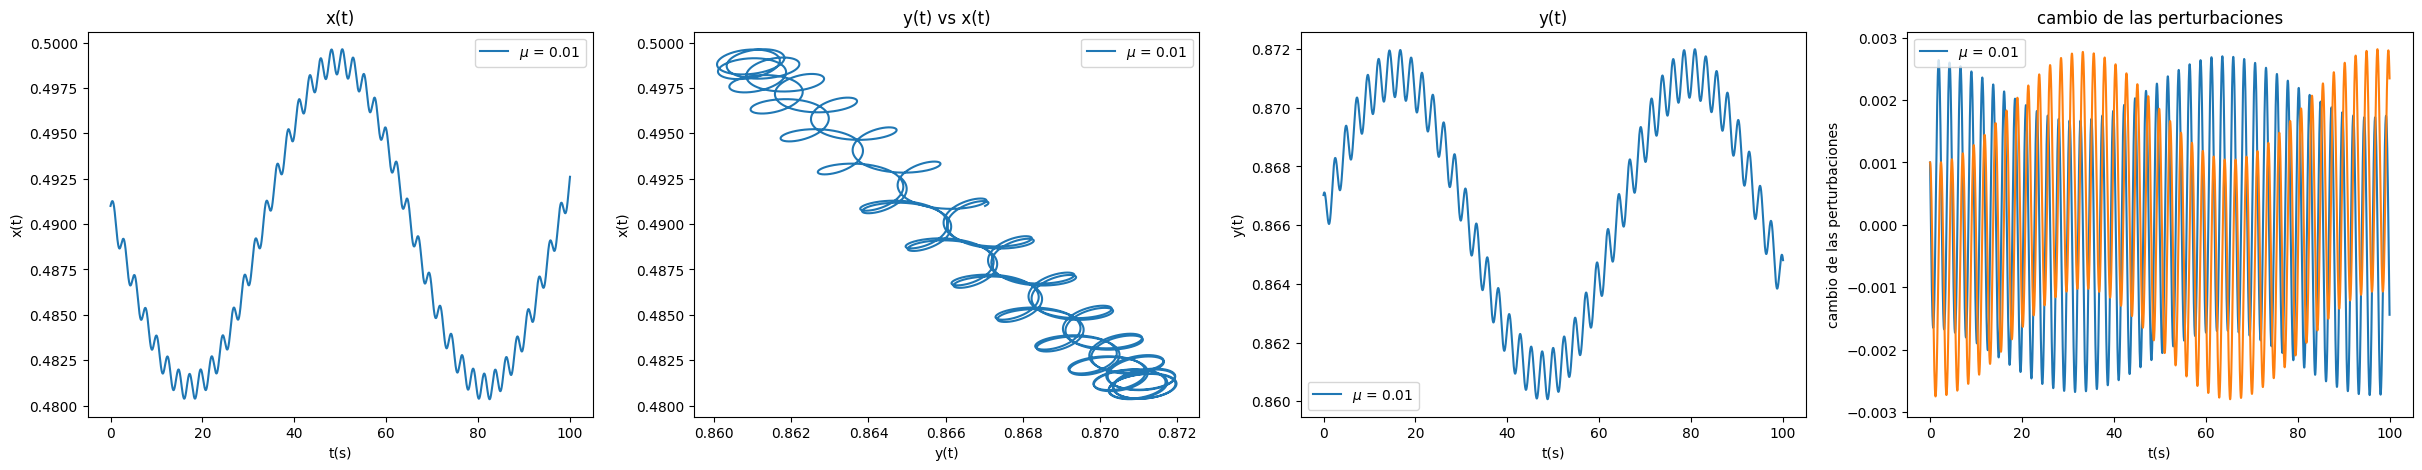

In [135]:
# grafiquemos la estabilidad alrededor de L4 con u = 0.01

def sistema(t, y):
  return A @ y

A = np.array([[0, 1, 0, 0],
              [a, 0, b, 2*w],
              [0, 0, 0, 1],
              [c, -2*w, d, 0]])

sol = solve_ivp(sistema, (0,100), np.array([0.001,0.001,0.001,0.001]) , t_eval=np.linspace(0, 100, 10000))

fig, axi = plt.subplots(1, 4, figsize = (30,5))
x = []
y = []
dx = []
dy = []

for i in range(len(sol.t)):
  x.append(L4[0] + sol.y[0][i])
  y.append(L4[1] + sol.y[2][i])

axi[0].plot(sol.t, x, label = f'$\mu$ = {u}')
axi[0].set_xlabel('t(s)')
axi[0].set_ylabel('x(t)')
axi[0].legend()
axi[0].set_title('x(t)')

axi[1].plot(y, x, label = f'$\mu$ = {u}')
axi[1].set_xlabel('y(t)')
axi[1].set_ylabel('x(t)')
axi[1].legend()
axi[1].set_title('y(t) vs x(t)')

axi[2].plot(sol.t, y, label = f'$\mu$ = {u}')
axi[2].set_xlabel('t(s)')
axi[2].set_ylabel('y(t)')
axi[2].legend()
axi[2].set_title('y(t)')

axi[3].plot(sol.t, sol.y[3], label = f'$\mu$ = {u}')
axi[3].plot(sol.t, sol.y[1])
axi[3].set_xlabel('t(s)')
axi[3].set_ylabel('cambio de las perturbaciones')
axi[3].set_title('cambio de las perturbaciones')
axi[3].legend()


plt.show()



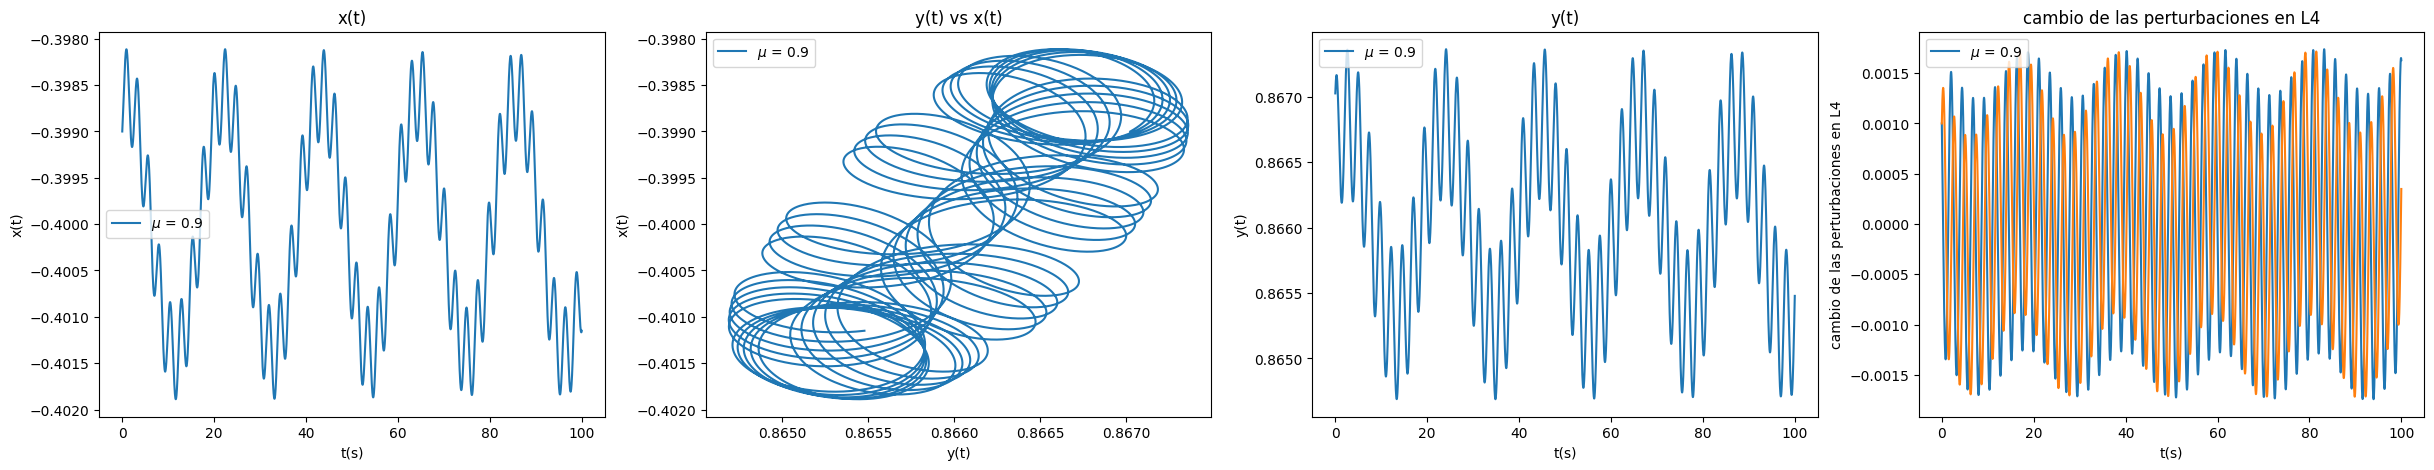

In [138]:
# Ahora Hagamos lo mismo pero para u = 0.9

def sistema(t, y):
  return A @ y

A = np.array([[0, 1, 0, 0],
              [a, 0, b, 2*w],
              [0, 0, 0, 1],
              [c, -2*w, d, 0]])

sol = solve_ivp(sistema, (0,100), np.array([0.001,0.001,0.001,0.001]) , t_eval=np.linspace(0, 100, 10000))

fig, axi = plt.subplots(1, 4, figsize = (30,5))
x = []
y = []
dx = []
dy = []

for i in range(len(sol.t)):
  x.append(L4[0] + sol.y[0][i])
  y.append(L4[1] + sol.y[2][i])

axi[0].plot(sol.t, x, label = f'$\mu$ = {u}')
axi[0].set_xlabel('t(s)')
axi[0].set_ylabel('x(t)')
axi[0].legend()
axi[0].set_title('x(t)')

axi[1].plot(y, x, label = f'$\mu$ = {u}')
axi[1].set_xlabel('y(t)')
axi[1].set_ylabel('x(t)')
axi[1].legend()
axi[1].set_title('y(t) vs x(t)')

axi[2].plot(sol.t, y, label = f'$\mu$ = {u}')
axi[2].set_xlabel('t(s)')
axi[2].set_ylabel('y(t)')
axi[2].legend()
axi[2].set_title('y(t)')

axi[3].plot(sol.t, sol.y[3], label = f'$\mu$ = {u}')
axi[3].plot(sol.t, sol.y[1])
axi[3].set_xlabel('t(s)')
axi[3].set_ylabel('cambio de las perturbaciones en L4')
axi[3].set_title('cambio de las perturbaciones en L4')
axi[3].legend()


plt.show()

# 9

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la **ecuación de Jeans** en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial $\Sigma(r,t)$ y la velocidad en presencia de la auto-gravitación del disco.  

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:  

$$
\frac{d^2 \Sigma}{dt^2} + \kappa^2 \Sigma = 0,
$$

donde $\kappa$ es la **frecuencia de epicíclo**, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular.  

En este problema, estudiaremos la estabilidad de estas oscilaciones en función de la velocidad de dispersión del disco y el criterio de Toomre para la formación de estructuras espirales.  


- Escribir el sistema de ecuaciones hidrodinámicas que gobiernan el movimiento de una perturbación en el disco.  
- Determinar la relación entre la frecuencia de epicíclo $\kappa$ y la curva de rotación de la galaxia.  
- Graficar la evolución temporal de $\Sigma(t)$.  
- Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.  
- Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.  
- Analizar cómo cambia la estabilidad del sistema al modificar $\kappa$.  


In [23]:
#a)
t, x, y = sp.symbols('t x y')
G  = sp.Symbol('G')   #Constante de gravitación universal
Sigma = sp.Function('Sigma')(t)   #Densidad superficial
v = sp.Function('v')(t, x, y)   #Velocidad
p = sp.Function('p')(t, x, y)   #Presion superficial del disco
Phi = sp.Function('Phi')(t, x, y)   #Potencial gravitacional

continuidad = sp.Eq(Sigma.diff(t) + (Sigma * v).diff(x) + (Sigma * v).diff(y),0)
euler = sp.Eq(v.diff(t) + (v.diff(x) + v.diff(y)) * v,-1/Sigma*(p.diff(x) + p.diff(y)) - (Phi.diff(x) + Phi.diff(y)))
poisson = sp.Eq(sp.diff(Phi, x, x) + sp.diff(Phi, y, y),4 * sp.pi * G * Sigma)
euler


Eq((Derivative(v(t, x, y), x) + Derivative(v(t, x, y), y))*v(t, x, y) + Derivative(v(t, x, y), t), -(Derivative(p(t, x, y), x) + Derivative(p(t, x, y), y))/Sigma(t) - Derivative(Phi(t, x, y), x) - Derivative(Phi(t, x, y), y))

In [24]:
#b)


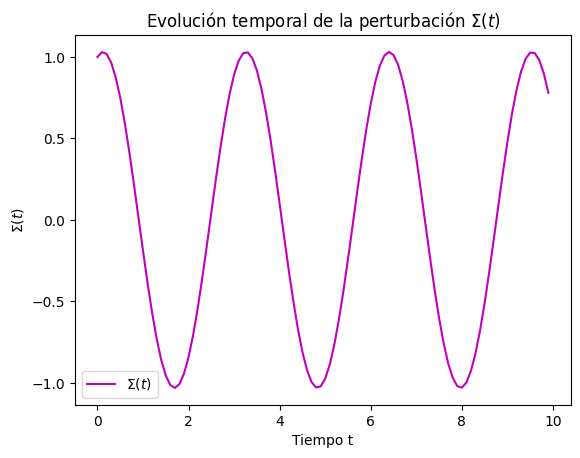

In [25]:
#c)
def f(t,y):
  dydt = np.zeros_like(y)
  dydt[0] = y[1]
  dydt[1] = -k**2*y[0]
  return dydt

#Condiciones iniciales
k = 2
sigma0 = [1,0.5]   #sigma y dsigma
ti = 0
tf = 10
t_span = [0,10]
h = 0.1
t_ = np.arange(ti,tf,h)

sol = solve_ivp(f,t_span,sigma0,t_eval=t_)
plt.plot(sol.t, sol.y[0], label=r'$\Sigma(t)$', color="m")
plt.xlabel('Tiempo t')
plt.ylabel(r'$\Sigma(t)$')
plt.title('Evolución temporal de la perturbación $\Sigma(t)$')
plt.legend()

In [26]:
#d)
A = np.array([
    [0,1],
    [-k**2,0]
], dtype=float)

valores_propios = np.linalg.eig(A)[0]
valores_propios

array([0.+2.j, 0.-2.j])

Los valores propios de la matriz asosicada al sistema son ki y -ki, su parte real es cero. Por lo tanto el sistema es estable y oscila sin crecer o decaer.

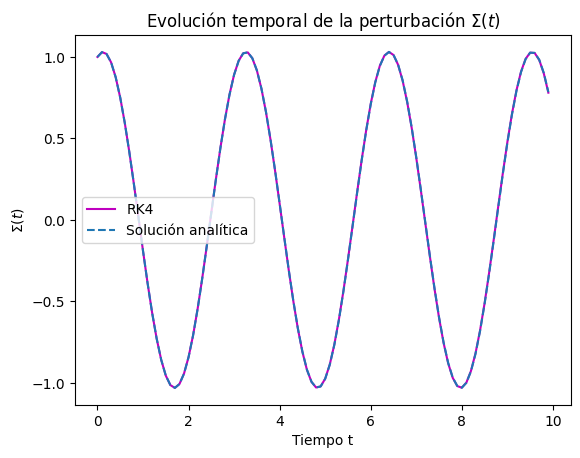

In [27]:
#e)
phi = np.arctan(k*sigma0[0]/sigma0[1])
A_ = sigma0[0]/np.sin(phi)

f_real = lambda t: A_*np.sin(k*t+phi)

plt.plot(sol.t, sol.y[0], label="RK4", color="m")
plt.plot(t_,f_real(t_),"--",label="Solución analítica")
plt.xlabel('Tiempo t')
plt.ylabel(r'$\Sigma(t)$')
plt.title('Evolución temporal de la perturbación $\Sigma(t)$')
plt.legend()

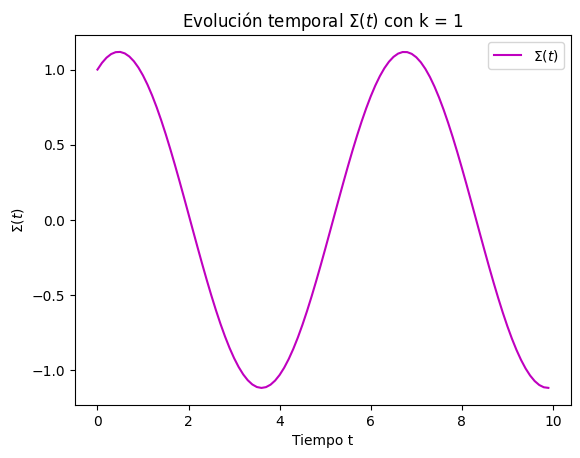

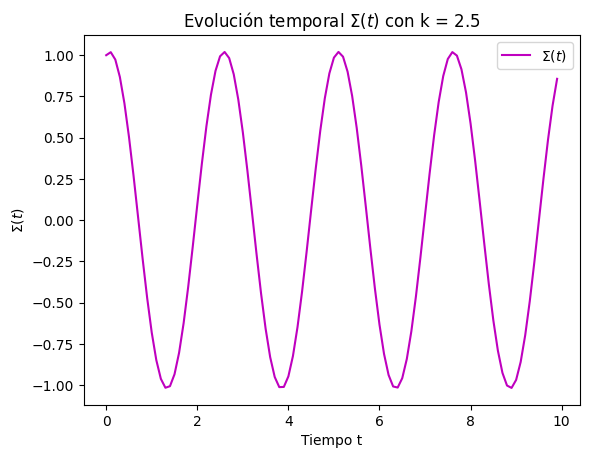

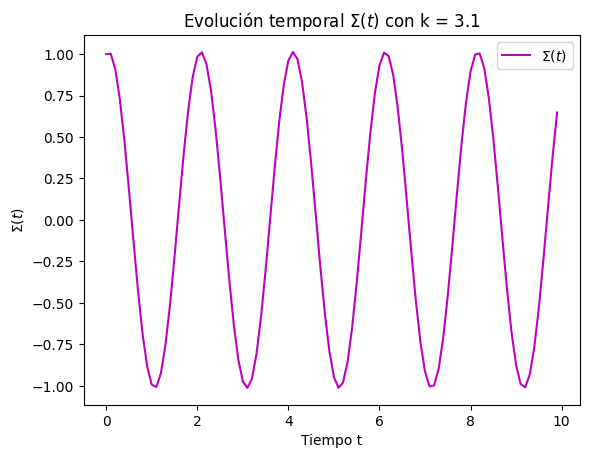

In [28]:
#f)
for i, a in enumerate([1,2.5,3.1]):
  plt.figure(i)
  k = a
  sol = solve_ivp(f,t_span,sigma0,t_eval=t_)
  plt.plot(sol.t, sol.y[0], label=r'$\Sigma(t)$', color="m")
  plt.xlabel('Tiempo t')
  plt.ylabel(r'$\Sigma(t)$')
  plt.title(f'Evolución temporal $\Sigma(t)$ con k = {a}')
  plt.legend()